#### Step 1: Import Required Libraries

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# To handle imbalanced classes
from imblearn.over_sampling import SMOTE

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load Data

In [16]:
train_df = pd.read_csv("aug_train.csv")
test_df = pd.read_csv("aug_test.csv")

In [17]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [18]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [21]:
train_df.shape

(19158, 14)

In [22]:
test_df.shape

(2129, 13)

###  Step 3: Data Preprocessing

In [23]:
train_df.drop(columns=['enrollee_id', 'city'],inplace=True)

In [24]:
test_df.drop(columns=['enrollee_id', 'city'],inplace=True)

In [25]:
print("Updated Training Data Shape:", train_df.shape)
print("Updated Test Data Shape:", test_df.shape)

Updated Training Data Shape: (19158, 12)
Updated Test Data Shape: (2129, 11)


In [26]:
train_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [27]:
test_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [28]:
train_df.isnull().sum()  ### Checking Mssing Value

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [29]:
test_df.isnull().sum()    ### Checking Mssing Value

city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [30]:
# Identify categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop("target", errors="ignore")  # Exclude target

In [31]:
categorical_cols

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [32]:
numerical_cols

Index(['city_development_index', 'training_hours'], dtype='object')


  Removal Summary 
 Removed 17 outliers from 'city_development_index'.
 Removed 984 outliers from 'training_hours'.


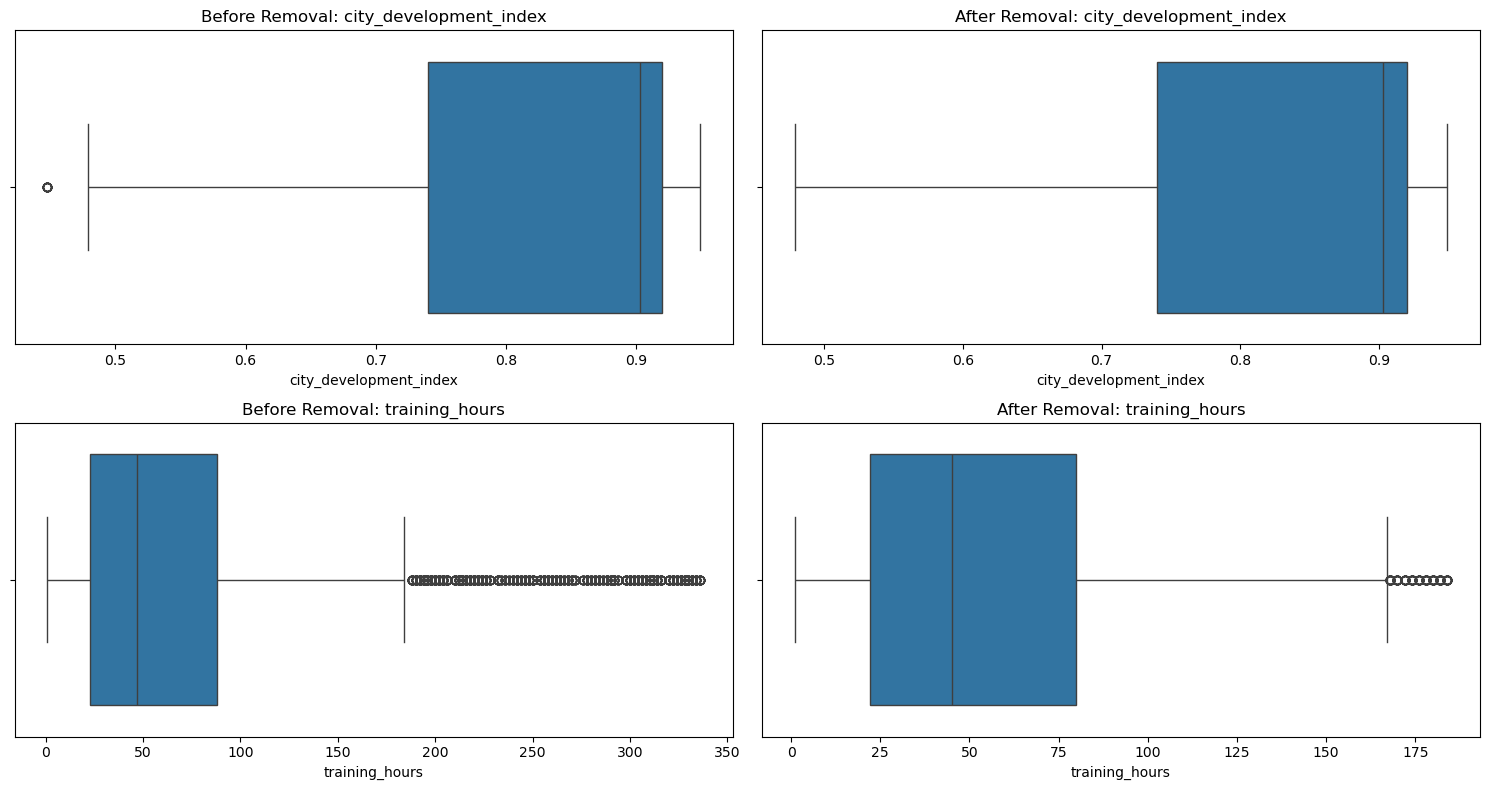

In [33]:
#### CHECKING AND REMOVING OUTLIERS ......
# Copy the original data for comparison
train_df_original = train_df.copy()

outlier_count = {}  # Dictionary to store the count of outliers

# Loop through each numerical column
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = train_df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Identify outliers
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    num_outliers = outliers.shape[0]  # Count the number of outliers

    if num_outliers > 0:  
        outlier_count[col] = num_outliers  # Store count
        # Remove outliers
        train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

# Print outlier removal summary
if outlier_count:
    print("\n  Removal Summary ")
    for col, count in outlier_count.items():
        print(f" Removed {count} outliers from '{col}'.")
else:
    print(" No outliers detected in any numerical columns!")

# --- Visualization: Before vs After Outlier Removal ---
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=train_df_original[col], ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Removal: {col}")

    sns.boxplot(x=train_df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"After Removal: {col}")

plt.tight_layout()
plt.show()



 Outlier Removal Summary 
 Removed 122 outliers from 'training_hours'.


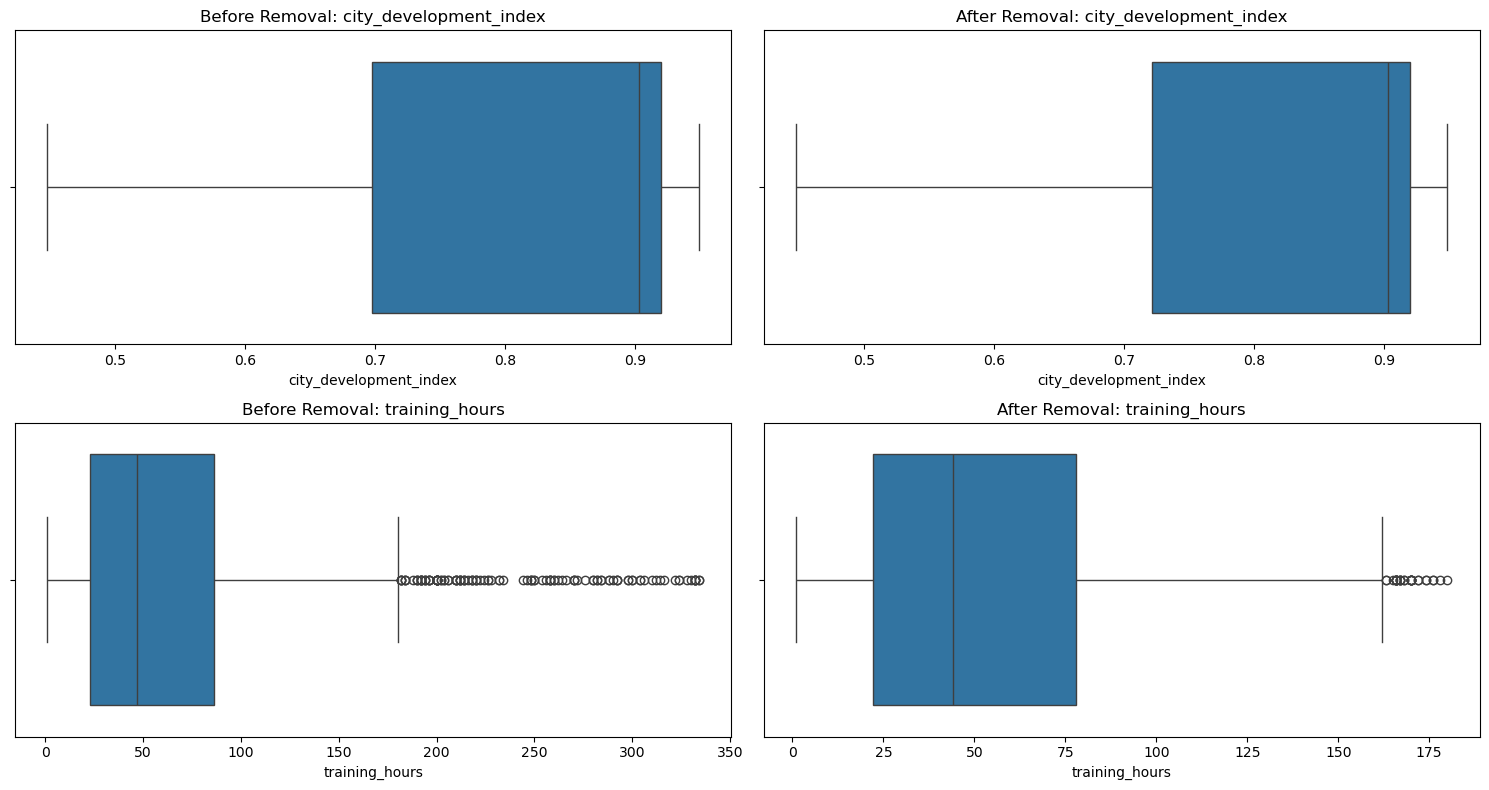

In [34]:

# Copy the original data for comparison
test_df_original = test_df.copy()

outlier_count = {}  # Dictionary to store the count of outliers

# Loop through each numerical column
for col in numerical_cols:
    Q1 = test_df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = test_df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Identify outliers
    outliers = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)]
    num_outliers = outliers.shape[0]  # Count the number of outliers

    if num_outliers > 0:  
        outlier_count[col] = num_outliers  # Store count
        # Remove outliers
        test_df = test_df[(test_df[col] >= lower_bound) & (test_df[col] <= upper_bound)]

# Print outlier removal summary
if outlier_count:
    print("\n Outlier Removal Summary ")
    for col, count in outlier_count.items():
        print(f" Removed {count} outliers from '{col}'.")
else:
    print(" No outliers detected in any numerical columns!")

# --- Visualization: Before vs After Outlier Removal ---
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=test_df_original[col], ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Removal: {col}")

    sns.boxplot(x=test_df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"After Removal: {col}")

plt.tight_layout()
plt.show()


In [35]:
# Handling missing values
cat_imputer = SimpleImputer(strategy="most_frequent")
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = cat_imputer.transform(test_df[categorical_cols])

In [36]:
train_df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [37]:
# To check for duplicate :
train_df.duplicated().sum()

117

In [38]:
test_df.duplicated().sum()

3

In [39]:
# Remove Duplicates.
train_df.drop_duplicates(inplace=True)

In [40]:
test_df.drop_duplicates(inplace = True)

In [41]:
train_df.duplicated().sum()

0

In [42]:
test_df.duplicated().sum()

0

In [43]:
train_df['gender'].value_counts() ## EXPLORE THE DATA.....

gender
Male      16685
Female     1175
Other       180
Name: count, dtype: int64

In [44]:
test_df['gender'].value_counts()  ## EXPLORE THE DATA.....

gender
Male      1856
Female     126
Other       22
Name: count, dtype: int64

In [45]:
train_df['company_type'].value_counts()   ## EXPLORE THE DATA.....

company_type
Pvt Ltd                15015
Funded Startup           945
Public Sector            910
Early Stage Startup      565
NGO                      489
Other                    116
Name: count, dtype: int64

In [46]:
test_df['company_size'].value_counts()   ## EXPLORE THE DATA.....

company_size
50-99        904
100-500      294
10000+       203
10/49        164
<10          155
1000-4999    135
500-999       85
5000-9999     64
Name: count, dtype: int64

In [47]:
# Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

In [48]:
print("Encoded Training Data (first 5 rows):")
print(train_df[categorical_cols].head())

Encoded Training Data (first 5 rows):
   gender  relevent_experience  enrolled_university  education_level  \
0       1                    0                    2                0   
1       1                    1                    2                0   
2       1                    1                    0                0   
3       1                    1                    2                0   
4       1                    0                    2                2   

   major_discipline  experience  company_size  company_type  last_new_job  
0                 5          21             4             5             0  
1                 5           6             4             5             4  
2                 5          15             4             5             5  
3                 1          20             4             5             5  
4                 5          21             4             1             3  


In [49]:
print("Encoded Test Data (first 5 rows):")
print(test_df[categorical_cols].head())

Encoded Test Data (first 5 rows):
   gender  relevent_experience  enrolled_university  education_level  \
0       1                    0                    0                0   
1       0                    0                    2                0   
2       1                    1                    2                1   
3       1                    0                    2                2   
4       1                    0                    2                0   

   major_discipline  experience  company_size  company_type  last_new_job  
0                 5          19             7             5             0  
1                 5          15             4             5             0  
2                 5          20             4             5             5  
3                 5           2             0             5             0  
4                 5          21             3             5             4  


In [50]:
# Scaling numerical features
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

### Step 4: Exploratory Data Analysis (EDA)

In [51]:
train_df.describe()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,1.804000e+04,18040.000000,18040.00000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,1.804000e+04,18040.000000
mean,2.349439e-16,0.944845,0.28010,1.544900,0.693404,4.714080,12.927439,3.357927,4.489246,1.744235,-2.402611e-17,0.250887
std,1.000028e+00,0.268464,0.44906,0.800785,0.995283,0.957528,6.603733,1.785987,1.296328,1.933937,1.000028e+00,0.433536
min,-2.847630e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.289263e+00,0.000000
25%,-7.239088e-01,1.000000,0.00000,1.000000,0.000000,5.000000,7.000000,2.000000,5.000000,0.000000,-7.935436e-01,0.000000
50%,6.023998e-01,1.000000,0.00000,2.000000,0.000000,5.000000,14.000000,4.000000,5.000000,1.000000,-2.506128e-01,0.000000
75%,7.407264e-01,1.000000,1.00000,2.000000,2.000000,5.000000,19.000000,4.000000,5.000000,4.000000,5.755862e-01,1.000000
max,9.766955e-01,2.000000,1.00000,2.000000,4.000000,5.000000,21.000000,7.000000,5.000000,5.000000,3.030578e+00,1.000000


<Figure size 1200x600 with 0 Axes>

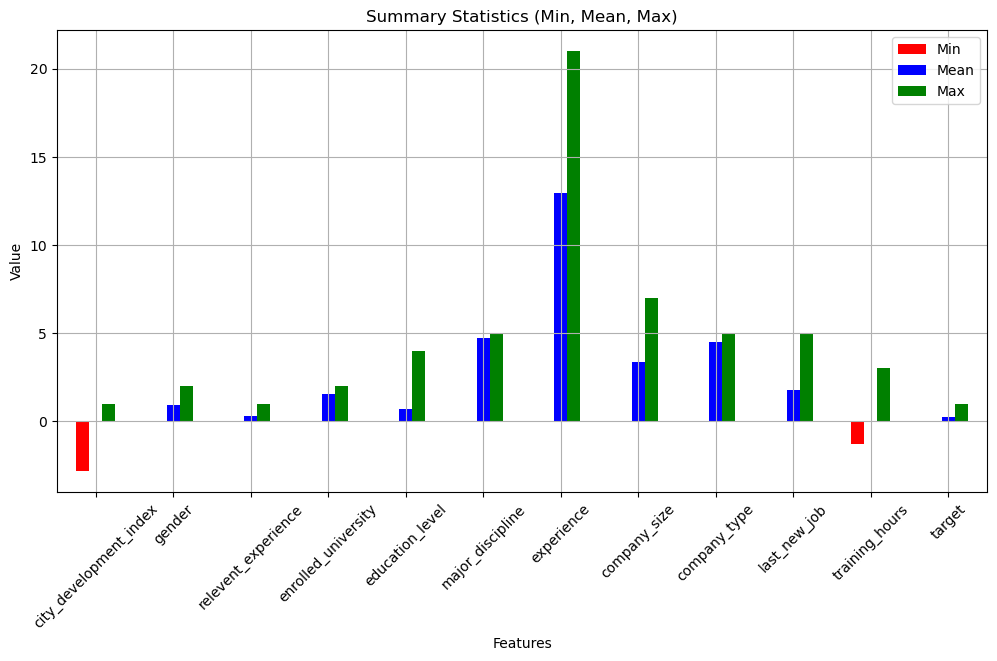

In [52]:

# Compute summary statistics
summary = train_df.describe().T  # Transpose for better visualization

# Plot Mean, Min, and Max
plt.figure(figsize=(12, 6))
summary[['min', 'mean', 'max']].plot(kind='bar', figsize=(12, 6), color=['red', 'blue', 'green'])
plt.title("Summary Statistics (Min, Mean, Max)")
plt.ylabel("Value")
plt.xlabel("Features")
plt.legend(["Min", "Mean", "Max"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [53]:
test_df.describe()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,-0.028345,0.948104,0.284930,1.522954,0.712076,4.742515,13.172655,3.334830,4.518463,1.712575,-0.034687
std,1.017116,0.266823,0.451494,0.811778,1.010891,0.891278,6.555354,1.850953,1.257294,1.903887,0.957875
min,-3.099873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.289263
25%,-0.870372,1.000000,0.000000,1.000000,0.000000,5.000000,8.000000,2.000000,5.000000,0.000000,-0.793544
50%,0.602400,1.000000,0.000000,2.000000,0.000000,5.000000,14.000000,4.000000,5.000000,1.000000,-0.274219
75%,0.740726,1.000000,1.000000,2.000000,2.000000,5.000000,19.000000,4.000000,5.000000,4.000000,0.528375
max,0.976695,2.000000,1.000000,2.000000,4.000000,5.000000,21.000000,7.000000,5.000000,5.000000,2.936155


<Figure size 1200x600 with 0 Axes>

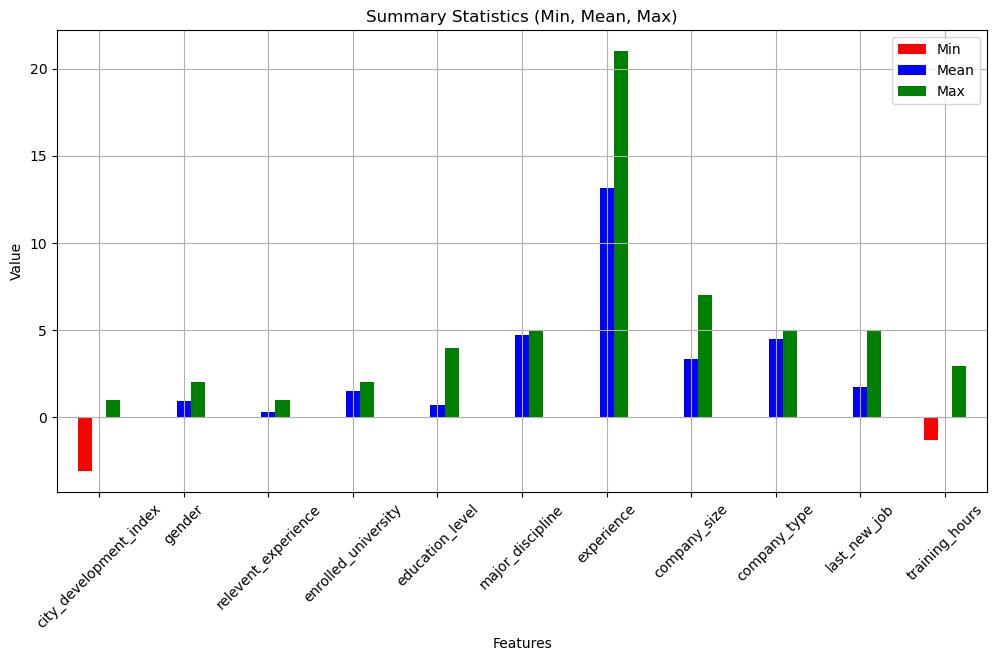

In [54]:

# Compute summary statistics
summary = test_df.describe().T  # Transpose for better visualization

# Plot Mean, Min, and Max
plt.figure(figsize=(12, 6))
summary[['min', 'mean', 'max']].plot(kind='bar', figsize=(12, 6), color=['red', 'blue', 'green'])
plt.title("Summary Statistics (Min, Mean, Max)")
plt.ylabel("Value")
plt.xlabel("Features")
plt.legend(["Min", "Mean", "Max"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


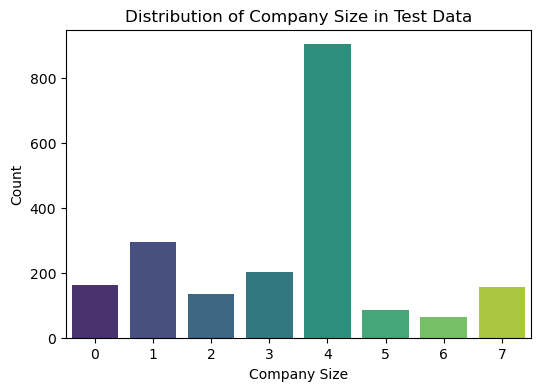

In [55]:
# Visualizing the Company Size  distribution
plt.figure(figsize=(6,4))
sns.countplot(x="company_size", data=test_df, palette="viridis")
plt.title("Distribution of Company Size in Test Data")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

#### Univariate Analysis (Single Feature Distribution)

##### Feature Distributions

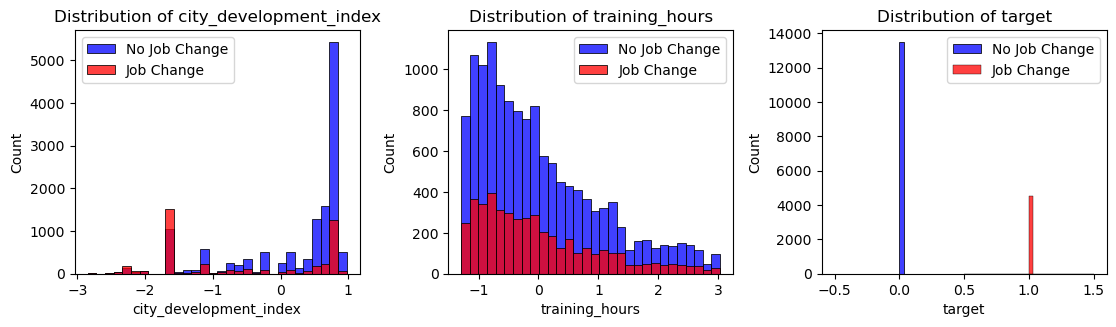

In [56]:

# Select numeric columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Create histogram plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    
    # Plot histograms separately for each target class
    sns.histplot(train_df[train_df['target'] == 0][col], bins=30, color='blue', label='No Job Change')
    sns.histplot(train_df[train_df['target'] == 1][col], bins=30, color='red',  label='Job Change')

    plt.title(f'Distribution of {col}')
    plt.legend()  # Ensure legend is displayed

plt.tight_layout()
plt.show()


#### Bivariate Analysis (Relationship Between Two Variables)

#### Relationship Between Features and Target Variable

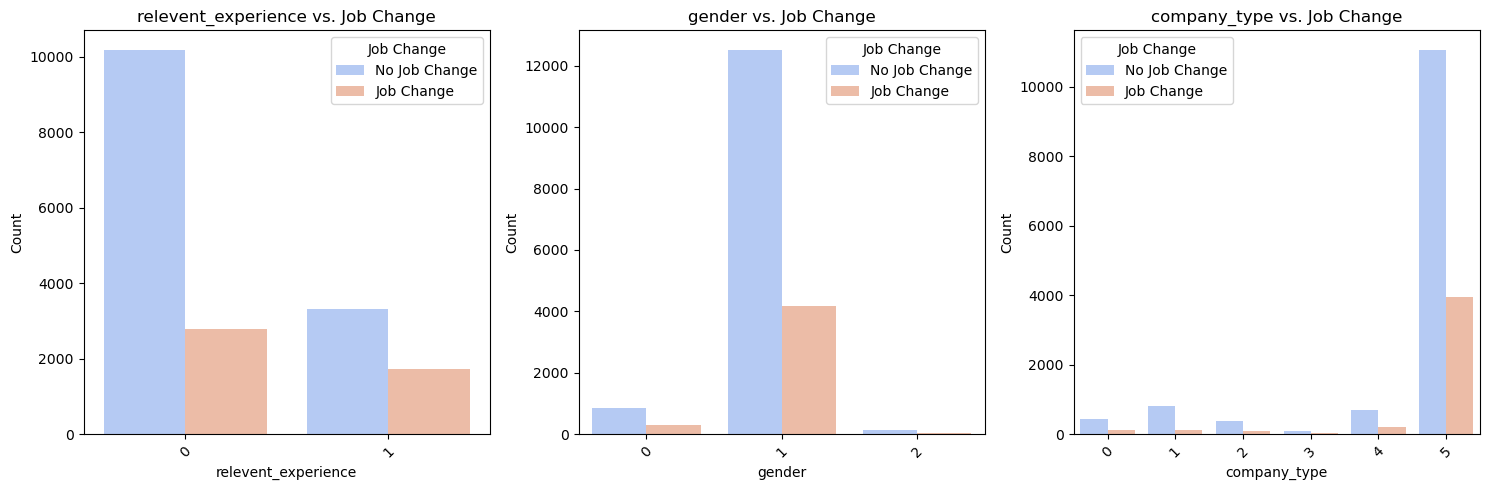

In [57]:
# Select numeric categorical columns
categorical_cols = ['relevent_experience', 'gender','company_type']  # Replace with actual column names

# Determine the number of rows and columns for subplots
num_cols = len(categorical_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange in 3 columns per row

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plot each categorical feature
for i, col in enumerate(categorical_cols):
    sns.countplot(x=train_df[col], hue=train_df['target'], palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{col} vs. Job Change')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Job Change", labels=['No Job Change', 'Job Change'])
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Multivariate Analysis

#####   Correlation Between Numerical Features

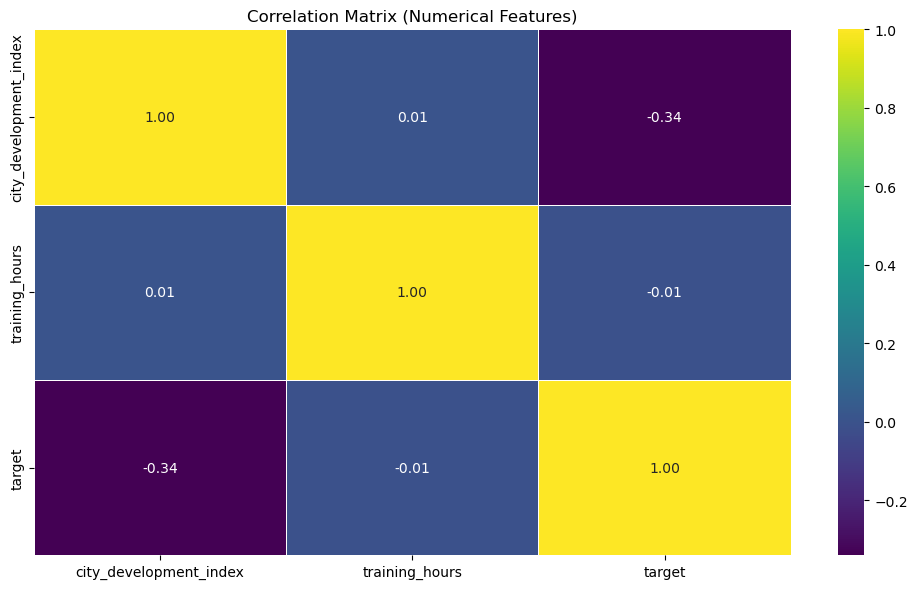

In [58]:
# Compute correlation matrix
corr_matrix = train_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

In [ ]:
# selected_features = ['city_development_index','training_hours', 'experience','target']
# sns.pairplot(train_df[selected_features], hue='target', palette='viridis')
# plt.show()

### Step 5: Feature Engineering

In [60]:
# Feature Engineering: Creating new features
train_df["experience_bin"] = train_df["experience"].map(lambda x: "Senior" if str(x).isdigit() and int(x) > 10 else "Junior")
test_df["experience_bin"] = test_df["experience"].map(lambda x: "Senior" if str(x).isdigit() and int(x) > 10 else "Junior")

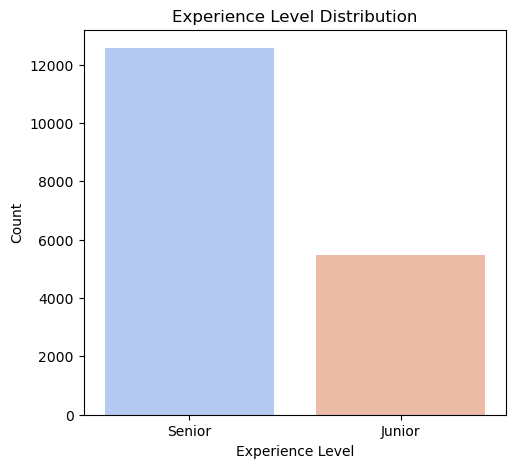

In [61]:
# Set figure size
plt.figure(figsize=(12, 5))

# Plot 1: Experience Bin Distribution
plt.subplot(1, 2, 1)
sns.countplot(x=train_df["experience_bin"], palette="coolwarm")
plt.title("Experience Level Distribution")
plt.xlabel("Experience Level")
plt.ylabel("Count")
# Show plots
plt.show()

In [62]:
# Create a new feature: 'years_since_last_job_change'
train_df['years_since_last_job_change'] = train_df['last_new_job']
test_df['years_since_last_job_change'] = test_df['last_new_job']

# Verify transformation
print(train_df[['last_new_job', 'years_since_last_job_change']].head())
print(test_df[['last_new_job', 'years_since_last_job_change']].head())

   last_new_job  years_since_last_job_change
0             0                            0
1             4                            4
2             5                            5
3             5                            5
4             3                            3
   last_new_job  years_since_last_job_change
0             0                            0
1             0                            0
2             5                            5
3             0                            0
4             4                            4


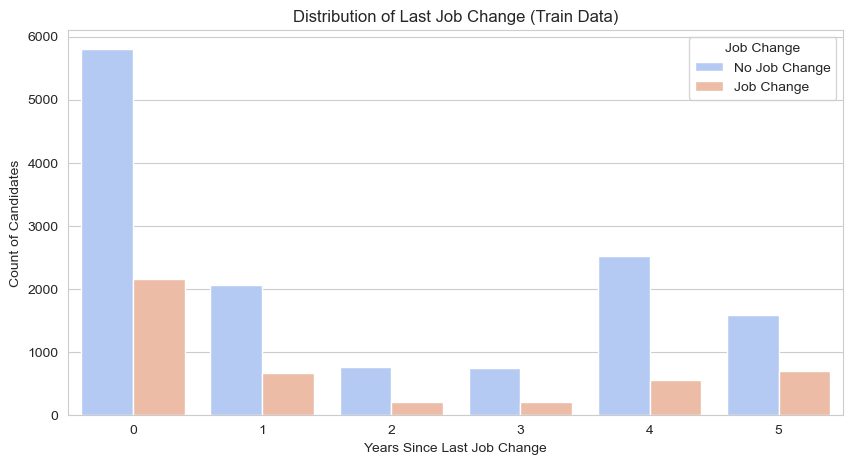

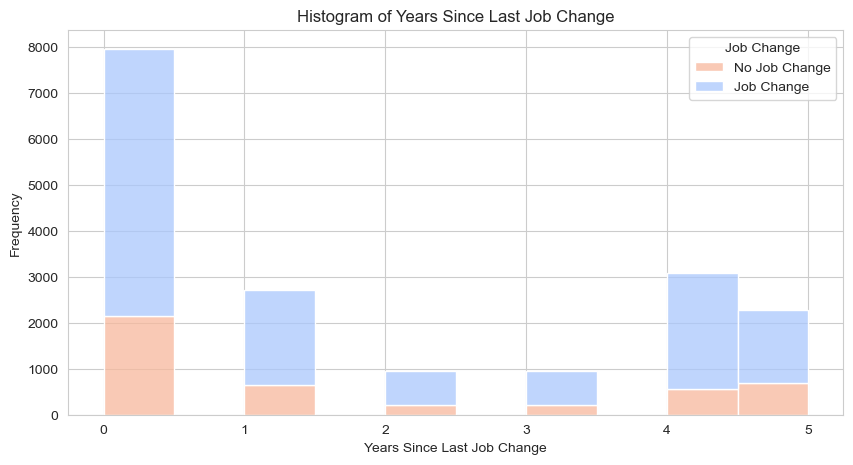

In [63]:
# Set style
sns.set_style("whitegrid")

# Plot 1: Bar plot of 'last_new_job'
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df['last_new_job'], hue=train_df['target'], palette='coolwarm')
plt.xlabel("Years Since Last Job Change")
plt.ylabel("Count of Candidates")
plt.title("Distribution of Last Job Change (Train Data)")
plt.legend(title="Job Change", labels=['No Job Change', 'Job Change'])
plt.show()

# Plot 2: Histogram for 'years_since_last_job_change'
plt.figure(figsize=(10, 5))
sns.histplot(train_df, x='years_since_last_job_change', hue='target', bins=10, multiple='stack', palette='coolwarm')
plt.xlabel("Years Since Last Job Change")
plt.ylabel("Frequency")
plt.title("Histogram of Years Since Last Job Change")
plt.legend(title="Job Change", labels=['No Job Change', 'Job Change'])

plt.show()


In [64]:
# Check the data type of 'experience_bin' in test_df
print("Data type of 'experience_bin' in test_df:", test_df['experience_bin'].dtype)

# Check for non-numeric values
print("\nUnique values in 'experience_bin':", test_df['experience_bin'].unique())

# Check if there are any missing or problematic values
print("\nAny missing values in 'experience_bin'?", test_df['experience_bin'].isnull().sum())

# Check the overall dataframe types
print("\nData types of test_df columns:\n", test_df.dtypes)

Data type of 'experience_bin' in test_df: object

Unique values in 'experience_bin': ['Senior' 'Junior']

Any missing values in 'experience_bin'? 0

Data types of test_df columns:
 city_development_index         float64
gender                           int32
relevent_experience              int32
enrolled_university              int32
education_level                  int32
major_discipline                 int32
experience                       int32
company_size                     int32
company_type                     int32
last_new_job                     int32
training_hours                 float64
experience_bin                  object
years_since_last_job_change      int32
dtype: object


In [65]:
mapping = {
    'Junior': 1,   # Assigning numeric values
    'Mid': 2,
    'Senior': 3,
    'Lead': 4,
    'Manager': 5
}

# Replace non-numeric categories with numbers
test_df['experience_bin'] = test_df['experience_bin'].replace(mapping)
train_df['experience_bin'] = train_df['experience_bin'].replace(mapping)

In [66]:
test_df['experience_bin']

0       3
1       3
2       3
3       1
4       3
       ..
2124    1
2125    1
2126    3
2127    3
2128    1
Name: experience_bin, Length: 2004, dtype: int64

In [67]:
train_df['experience_bin']

0        3
1        1
2        3
3        3
4        3
        ..
19153    1
19154    1
19155    3
19156    3
19157    3
Name: experience_bin, Length: 18040, dtype: int64

In [68]:
print(test_df['experience_bin'].dtype)
print(train_df['experience_bin'].dtype)

int64
int64


In [69]:
test_df['experience_bin'] = test_df['experience_bin'].astype(float)


In [70]:
train_df['experience_bin'] = train_df['experience_bin'].astype(float)

In [71]:
print(test_df['experience_bin'].dtype)
print(train_df['experience_bin'].dtype)

float64
float64


### Step 6: Train-Test Split

In [72]:
# Split train data for validation
X = train_df.drop(columns=["target"])
y = train_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
print(X_train.dtypes)

city_development_index         float64
gender                           int32
relevent_experience              int32
enrolled_university              int32
education_level                  int32
major_discipline                 int32
experience                       int32
company_size                     int32
company_type                     int32
last_new_job                     int32
training_hours                 float64
experience_bin                 float64
years_since_last_job_change      int32
dtype: object


In [74]:
len(X)

18040

In [75]:
len(X_train)

14432

In [76]:
len(X_test)

3608

In [77]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [78]:
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE: ", np.bincount(y_resampled))

Before SMOTE: [10811  3621]
After SMOTE:  [10811 10811]


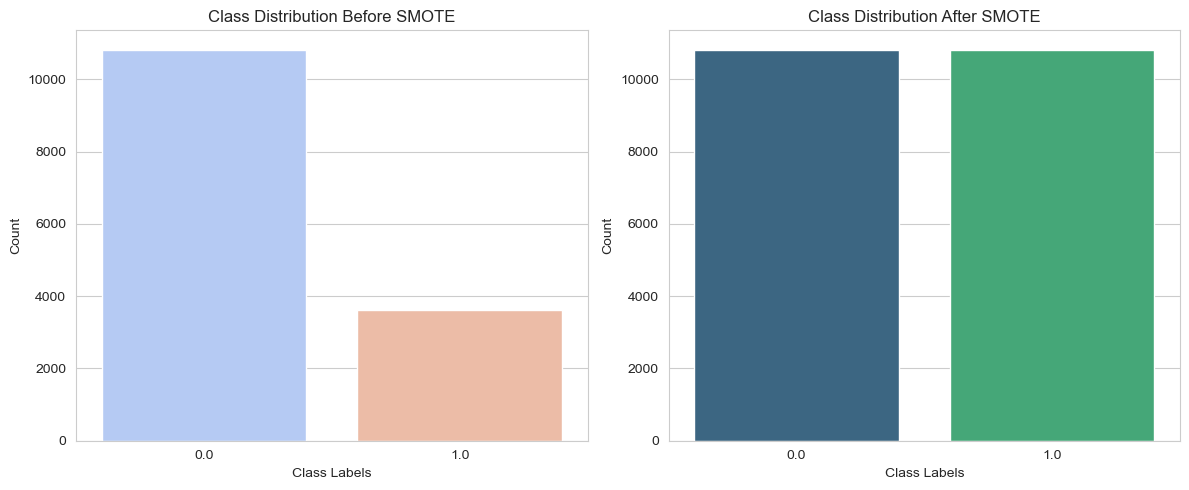

In [79]:
plt.figure(figsize=(12, 5))
# Plot 1: Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class Labels")
plt.ylabel("Count")

# Plot 2: After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class Labels")
plt.ylabel("Count")

# Show the plots
plt.tight_layout()
plt.show()

### Step 8: Model Training & Selection


 Model: Logistic Regression
 Accuracy: 0.7151
 ROC-AUC Score: 0.7349
 Classification Report :
                precision    recall  f1-score   support

         0.0       0.86      0.74      0.80      2703
         1.0       0.45      0.63      0.53       905

    accuracy                           0.72      3608
   macro avg       0.65      0.69      0.66      3608
weighted avg       0.76      0.72      0.73      3608



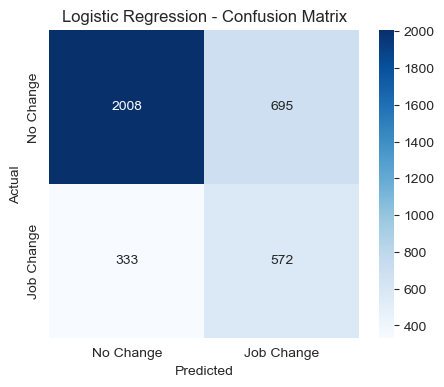

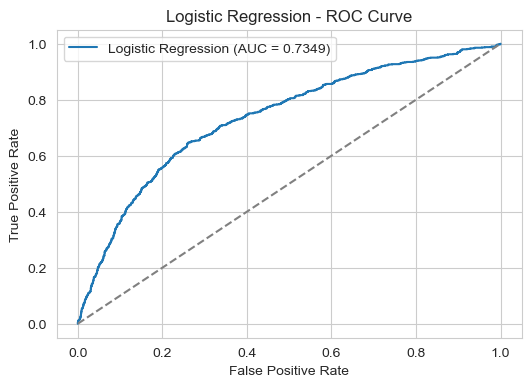


 Model: Random Forest
 Accuracy: 0.7375
 ROC-AUC Score: 0.7311
 Classification Report :
                precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      2703
         1.0       0.48      0.51      0.49       905

    accuracy                           0.74      3608
   macro avg       0.65      0.66      0.66      3608
weighted avg       0.74      0.74      0.74      3608



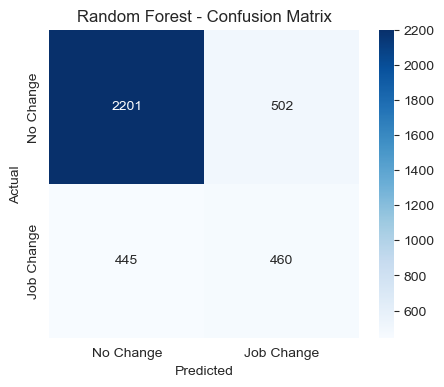

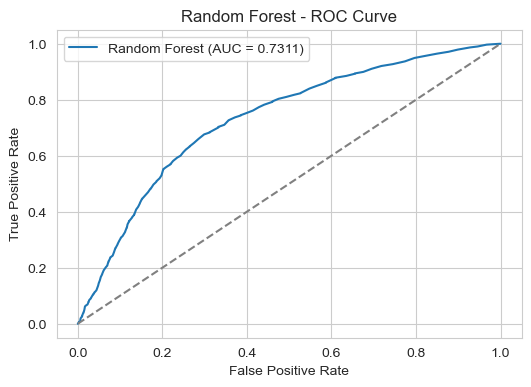


 Model: XGBoost
 Accuracy: 0.7458
 ROC-AUC Score: 0.7538
 Classification Report :
                precision    recall  f1-score   support

         0.0       0.85      0.80      0.83      2703
         1.0       0.49      0.58      0.53       905

    accuracy                           0.75      3608
   macro avg       0.67      0.69      0.68      3608
weighted avg       0.76      0.75      0.75      3608



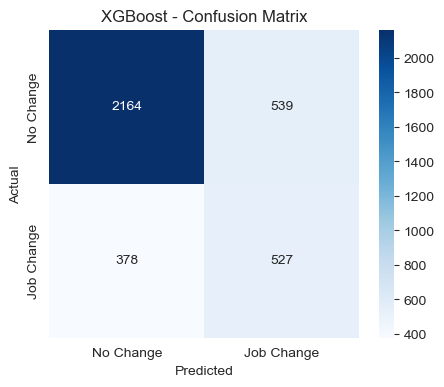

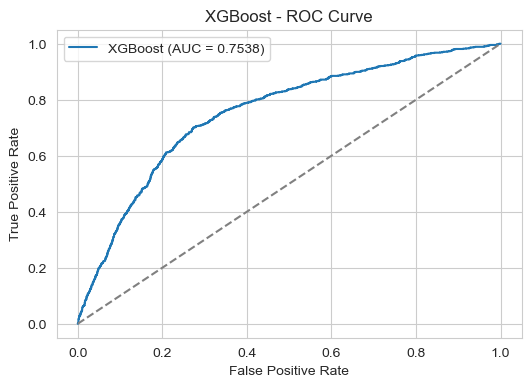

[LightGBM] [Info] Number of positive: 10811, number of negative: 10811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 21622, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

 Model: LightGBM
 Accuracy: 0.7569
 ROC-AUC Score: 0.7685
 Classification Report :
                precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      2703
         1.0       0.51      0.62      0.56       905

    accuracy                           0.76      3608
   macro avg       0.69      0.71      0.70      3608
weighted avg       0.78      0.76      0.76      3608



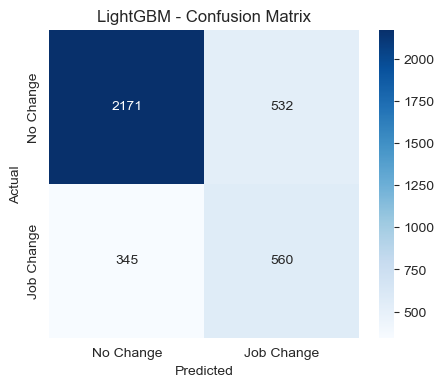

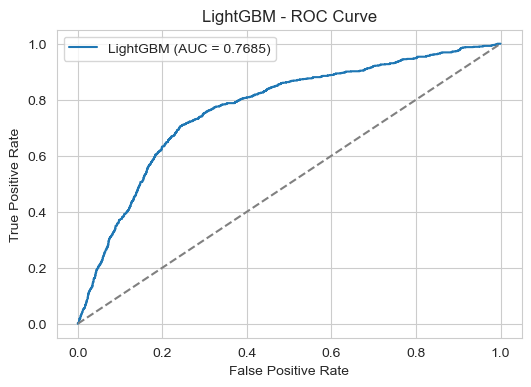


 Model Performance Summary:
Logistic Regression: Accuracy = 0.7151, ROC-AUC = 0.7349
Random Forest: Accuracy = 0.7375, ROC-AUC = 0.7311
XGBoost: Accuracy = 0.7458, ROC-AUC = 0.7538
LightGBM: Accuracy = 0.7569, ROC-AUC = 0.7685


In [80]:
# Store results
model_results = {}

# Function to plot Confusion Matrix & ROC-AUC
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """Train model, generate confusion matrix, accuracy, and ROC-AUC curve and  Classification report."""
    
    # Train model
    model.fit(X_resampled, y_resampled)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    
    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    # Store results
    model_results[model_name] = {"Accuracy": accuracy, "ROC-AUC": roc_auc, "Confusion Matrix": cm, "Classification report": report}
    
    # Print performance metrics
    print(f"\n Model: {model_name}")
    print(f" Accuracy: {accuracy:.4f}")
    print(f" ROC-AUC Score: {roc_auc:.4f}")
    print (f" Classification Report :\n  {report}")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Change', 'Job Change'], yticklabels=['No Change', 'Job Change'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()
    
    # Plot ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random Guess Line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

#  Train & Evaluate Logistic Regression
log_model = LogisticRegression(max_iter=1000)
evaluate_model(log_model, "Logistic Regression", X_resampled, X_test, y_resampled, y_test)

#  Train & Evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest", X_resampled, X_test, y_resampled, y_test)

#  Train & Evaluate XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb_model, "XGBoost", X_resampled, X_test, y_resampled, y_test)

#  Train & Evaluate LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
evaluate_model(lgbm_model, "LightGBM", X_resampled, X_test, y_resampled, y_test)
# Print Summary of Results
print("\n Model Performance Summary:")
for model, metrics in model_results.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.4f}, ROC-AUC = {metrics['ROC-AUC']:.4f}")

##### Best Model: LightGBM 
Highest Accuracy (75.69 %)
Best ROC-AUC Score (76.85 %)

Since LightGBM has the highest accuracy and ROC-AUC, it is the best model to proceed with further optimizations like hyperparameter tuning. 

#### Hyperparameter Tuning with RandomizedSearchCV

In [81]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter distributions
param_dist = {
    'n_estimators': np.arange(100, 600, 100),
    'max_depth': np.arange(3, 15, 2),
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'num_leaves': np.arange(20, 100, 20),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized Search
random_search = RandomizedSearchCV( 
    LGBMClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30, 
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit model
random_search.fit(X_resampled, y_resampled)

# Best parameters
best_params = random_search.best_params_
print("\n Best Hyperparameters:", best_params)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 10811, number of negative: 10811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 21622, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

#### Train LightGBM with Best Parameters

In [82]:
# Train final model with best parameters
best_lgbm = LGBMClassifier(**best_params, random_state=42)
best_lgbm.fit(X_resampled, y_resampled)

# Predictions
y_pred = best_lgbm.predict(X_test)
y_prob = best_lgbm.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\n Tuned LightGBM Accuracy: {accuracy:.4f}")
print(f" Tuned LightGBM ROC-AUC: {roc_auc:.4f}")
print(f" Tuned LightGBM Classification Report :\n  {report}")


[LightGBM] [Info] Number of positive: 10811, number of negative: 10811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 21622, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

### Step 9: Model Performance Visualization

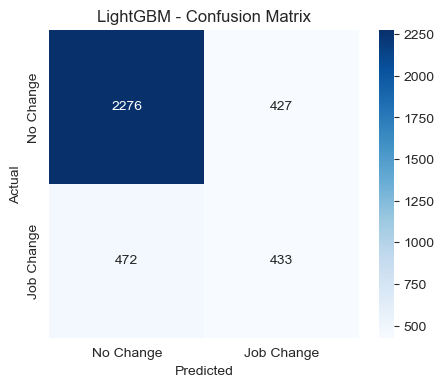

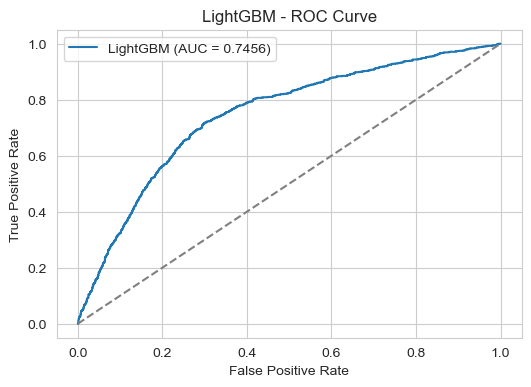

In [83]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Change', 'Job Change'], yticklabels=['No Change', 'Job Change'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM - Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LightGBM - ROC Curve")
plt.legend()
plt.show()


##### Feature Importance Analysis

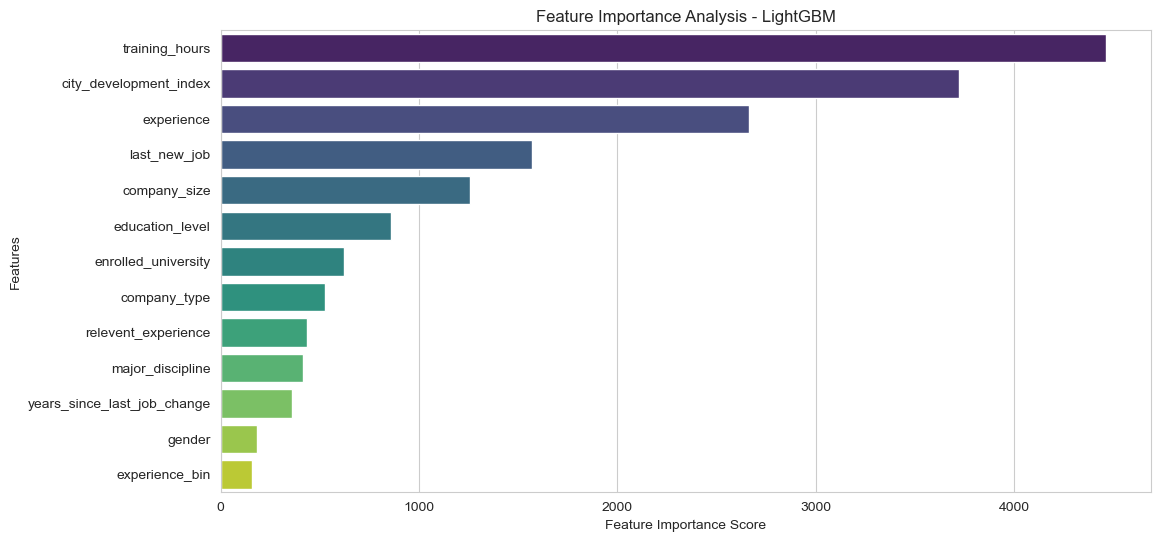

In [84]:

# Extract feature importance from trained LightGBM model
feature_importances = best_lgbm.feature_importances_

# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Analysis - LightGBM")
plt.show()


### Step 10: Predict on Test Data

In [85]:
test_predictions = best_lgbm.predict(test_df)
#  Assign an ID (using index as ID in test dataset)
test_ids = test_df.index  # Using index as the ID

#  Save Predictions to CSV
submission = pd.DataFrame({'ID': test_ids, 'Job_Change_Prediction': test_predictions})
submission.to_csv('job_Change_prediction.csv', index=False)

print("\n Predictions saved successfully as 'job_Change_prediction.csv'")



 Predictions saved successfully as 'job_Change_prediction.csv'


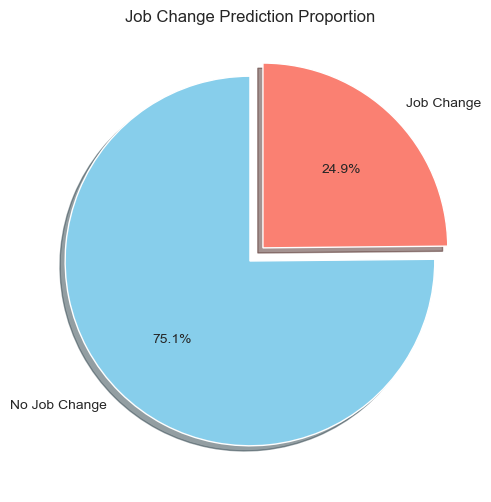

In [86]:
#### pie chart for Job Change Prediction Proportion
labels = ['No Job Change', 'Job Change']
sizes = [sum(test_predictions == 0), sum(test_predictions == 1)]
colors = ['skyblue', 'salmon']
explode = (0, 0.1)  # Highlight "Job Change" segment

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Job Change Prediction Proportion")
plt.show()


####  Save the Trained Model

In [87]:
import joblib

# Save the trained LightGBM model
joblib.dump(best_lgbm, 'job_change_model.pkl')

print("\n Model saved successfully as 'job_change_model.pkl'")



 Model saved successfully as 'job_change_model.pkl'
